In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
from pathlib import Path

notebook_path = "/u/skarmakar1/version_check/llm_steering-main/sk"
sys.path.append(notebook_path)

In [3]:
import torch
import numpy as np

from inversion_utils import *
import pickle
from sklearn.model_selection import train_test_split


In [4]:
with open('../all_gitignore/sk2_items/RR_ckpt/LRR/llama8b/lrr_models.pkl', 'rb') as file:
    lrr_models_9010 = pickle.load(file)

In [5]:
with open('../all_gitignore/sk2_items/RR_ckpt/LRR/llama8b/lrr_models_S0.pkl', 'rb') as file:
    lrr_models_9010_0 = pickle.load(file)

In [6]:
with open('../all_gitignore/sk2_items/RR_ckpt/LRR/llama8b/lrr_models_S1.pkl', 'rb') as file:
    lrr_models_9010_1 = pickle.load(file)

In [7]:
with open('../all_gitignore/sk2_items/RR_ckpt/LRR/llama8b/lrr_models_S2.pkl', 'rb') as file:
    lrr_models_9010_2 = pickle.load(file)

In [8]:
with open('../all_gitignore/sk2_items/RR_ckpt/LRR/llama8b/lrr_models_04.pkl', 'rb') as file:
    lrr_models_6040 = pickle.load(file)

In [9]:
with open('../all_gitignore/sk2_items/RR_ckpt/LRR/llama8b/lrr_models_07.pkl', 'rb') as file:
    lrr_models_3070 = pickle.load(file)

In [10]:
with open('../all_gitignore/sk2_items/RR_ckpt/LRR/llama8b/lrr_models_full.pkl', 'rb') as file:
    lrr_models_full = pickle.load(file)

In [11]:
with open('../all_gitignore/sk2_items/RR_ckpt/LRR/llama8b/lrr_models_intensity.pkl', 'rb') as file:
    lrr_models_intensity = pickle.load(file)

In [12]:
thresh = 0.5
# thresh = 0.005

In [13]:
with open(f'/scratch/bbjr/skarmakar/neuinv/min_rank/llama8b/W_b_({thresh}).pkl', 'rb') as file:
    test_weights_9010, test_biases_9010 = pickle.load(file)

/u/skarmakar1/miniconda3/envs/neuinv/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


In [14]:
with open(f'/scratch/bbjr/skarmakar/neuinv/min_rank/llama8b/W_b_04({thresh}).pkl', 'rb') as file:
    test_weights_6040, test_biases_6040 = pickle.load(file)

In [15]:
with open(f'/scratch/bbjr/skarmakar/neuinv/min_rank/llama8b/W_b_07({thresh}).pkl', 'rb') as file:
    test_weights_3070, test_biases_3070 = pickle.load(file)

In [ ]:
print(test_weights_9010[-30])

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')


: 

In [19]:
layer = -30

In [20]:
va1, ve1 = eig(test_weights_9010[layer].cpu().numpy())

va1_new = sorted([i.real for i in va1], reverse=True)
va1_img = sorted([i.imag for i in va1], reverse=True)

for i in va1_img:
    if round(i, 3) != 0.0:
        print(i)

for i in va1_new:
    print(round(i, 3))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


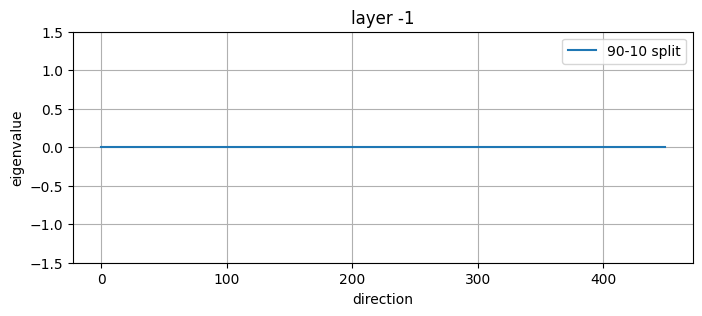

In [21]:
plt.figure(figsize=(8, 3))
# plt.plot(va1_new, label="90-10 split")
plt.plot(va1_new[:225] + va1_new[-225:], label="90-10 split")
plt.ylim(-1.5, 1.5)
plt.legend(loc="upper right")
plt.title(f"layer -1")
plt.xlabel("direction")
plt.ylabel("eigenvalue")
plt.grid(True)

In [ ]:
weight_t1, bias_t1 = get_W_b(lrr_models_9010[layer])
weight_t2, bias_t2 = get_W_b(lrr_models_6040[layer])

va1, ve1 = eig(weight_t1)

va1_new = sorted([i.real for i in va1], reverse=True)
va1_img = sorted([i.imag for i in va1], reverse=True)

for i in va1_img:
    if round(i, 3) != 0.0:
        print(i)

for i in va1_new:
    print(round(i, 3))

0.682
0.663
0.571
0.56
0.543
0.485
0.475
0.455
0.446
0.436
0.414
0.403
0.402
0.384
0.37
0.359
0.358
0.355
0.341
0.329
0.325
0.317
0.314
0.306
0.301
0.295
0.288
0.286
0.279
0.276
0.268
0.266
0.264
0.262
0.257
0.254
0.242
0.24
0.237
0.233
0.231
0.228
0.223
0.223
0.217
0.213
0.21
0.208
0.206
0.204
0.201
0.198
0.196
0.194
0.192
0.189
0.188
0.186
0.183
0.182
0.179
0.175
0.174
0.17
0.17
0.168
0.166
0.165
0.164
0.161
0.157
0.157
0.156
0.155
0.152
0.151
0.148
0.147
0.146
0.143
0.141
0.141
0.139
0.136
0.135
0.133
0.132
0.132
0.131
0.129
0.127
0.126
0.124
0.123
0.121
0.121
0.118
0.117
0.115
0.115
0.113
0.112
0.111
0.109
0.108
0.107
0.106
0.106
0.104
0.104
0.103
0.102
0.101
0.098
0.098
0.095
0.094
0.094
0.092
0.092
0.091
0.089
0.089
0.087
0.087
0.085
0.084
0.084
0.083
0.081
0.081
0.079
0.079
0.078
0.077
0.077
0.077
0.075
0.074
0.073
0.072
0.072
0.07
0.07
0.069
0.069
0.068
0.067
0.066
0.065
0.065
0.064
0.063
0.062
0.061
0.061
0.06
0.059
0.058
0.057
0.056
0.056
0.055
0.054
0.054
0.052
0.051
0.051
0

In [ ]:
va2, ve2 = eig(weight_t2)
va2_new = sorted([i.real for i in va2], reverse=True)
va2_img = sorted([i.imag for i in va2], reverse=True)

for i in va2_img:
    if round(i, 3) != 0.0:
        print(i)

for i in va2_new:
    print(round(i, 3))

0.643
0.606
0.533
0.514
0.478
0.444
0.436
0.424
0.392
0.384
0.378
0.371
0.353
0.342
0.335
0.33
0.32
0.317
0.306
0.298
0.292
0.285
0.278
0.275
0.266
0.263
0.259
0.256
0.251
0.249
0.24
0.235
0.23
0.224
0.22
0.219
0.213
0.211
0.207
0.206
0.204
0.198
0.196
0.194
0.19
0.185
0.183
0.18
0.179
0.175
0.172
0.17
0.167
0.165
0.164
0.161
0.161
0.158
0.155
0.153
0.15
0.147
0.146
0.144
0.143
0.139
0.137
0.134
0.133
0.131
0.131
0.129
0.128
0.126
0.123
0.122
0.12
0.118
0.117
0.115
0.114
0.112
0.109
0.108
0.104
0.103
0.101
0.1
0.098
0.097
0.096
0.094
0.091
0.09
0.09
0.088
0.087
0.084
0.083
0.082
0.081
0.079
0.078
0.077
0.075
0.074
0.072
0.071
0.07
0.069
0.067
0.065
0.064
0.064
0.063
0.061
0.06
0.058
0.057
0.055
0.054
0.053
0.05
0.049
0.048
0.048
0.047
0.046
0.045
0.043
0.042
0.041
0.04
0.039
0.037
0.036
0.036
0.031
0.031
0.026
0.022
0.018
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

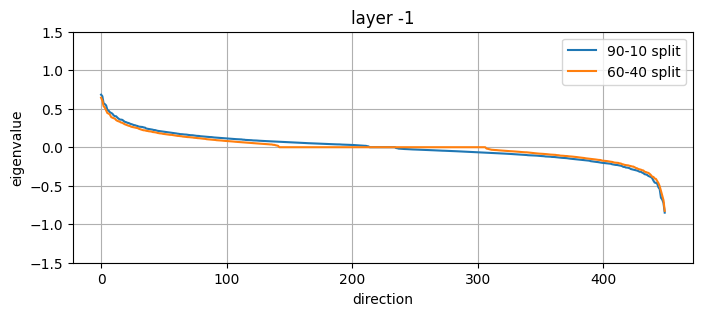

In [ ]:
plt.figure(figsize=(8, 3))
# plt.plot(va1_new, label="90-10 split")
plt.plot(va1_new[:225] + va1_new[-225:], label="90-10 split")
plt.plot(va2_new[:225] + va2_new[-225:], label="60-40 split")
plt.ylim(-1.5, 1.5)
plt.legend(loc="upper right")
plt.title(f"layer -1")
plt.xlabel("direction")
plt.ylabel("eigenvalue")
plt.grid(True)
# plt.savefig("../all_gitignore/sk2_items/RR_plots/inverse/9010_6040.svg", format="svg")

In [5]:
layer = -1

weight_t1, bias_t1 = get_W_b(lrr_models_intensity[layer])
weight_t2, bias_t2 = get_W_b(lrr_models_intensity[layer])

va1, ve1 = eig(weight_t1)
va1_new = sorted([i.real for i in va1], reverse=True)
va1_img = sorted([i.imag for i in va1], reverse=True)

for i in va1_img:
    if round(i, 3) != 0.0:
        print(i)

# for i in va1_new:
#     print(round(i, 3))

0.10564214053968693
0.09885970695042438
0.09814902323098501
0.0872529482464101
0.08690501575143496
0.07962765009989292
0.07926779416165597
0.07725854813045163
0.0694647272762019
0.0655485629568892
0.0649261972110145
0.06332002279664045
0.06296201590535941
0.06293238225316447
0.05908373389998938
0.05775671983121946
0.05447657417344034
0.05363102091290279
0.05237193939104347
0.051828537308770045
0.048300487547678794
0.047866950913202956
0.04727589353071963
0.044974988722744975
0.04103338850105769
0.03920071299761254
0.03838737642727908
0.03708884003358994
0.03661048046637366
0.03454766138133993
0.033653184515876476
0.033229855451856166
0.033075060683401436
0.032121641083415
0.03015014908412841
0.030106250213817527
0.02878909532956025
0.026201942849370868
0.026021923345783505
0.02471481289735776
0.024394290290136667
0.021880580695944615
0.02148467981985497
0.02095614232515526
0.02031132862571664
0.020025186203767892
0.01848008221919698
0.017620740856621273
0.017349150063452726
0.017043935

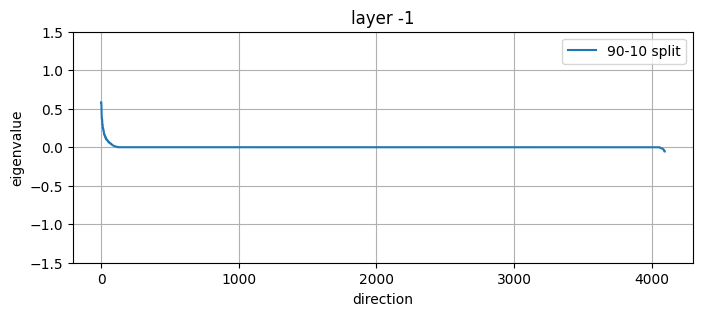

In [6]:
plt.figure(figsize=(8, 3))
# plt.plot(egv[:25])
plt.plot(va1_new, label="90-10 split")
# plt.plot(va1_new[:500] + va1_new[-500:])
plt.ylim(-1.5, 1.5)
plt.legend(loc="upper right")
plt.title(f"layer {layer}")
plt.xlabel("direction")
plt.ylabel("eigenvalue")
plt.grid(True)
plt.savefig(f"../all_gitignore/sk2_items/RR_plots/intense/layer{layer}.svg", format="svg")

In [7]:
from scipy.linalg import subspace_angles

In [11]:
layer = -1

In [12]:
weight_t1, bias_t1 = get_W_b(lrr_models_9010[layer])
weight_t2, bias_t2 = get_W_b(lrr_models_6040[layer])

In [13]:
va_f1, ve_f1 = eig(weight_t1)
va_f2, ve_f2 = eig(weight_t2)

In [25]:
# Sort F1
idx_f1 = np.argsort(va_f1.real)
sorted_vecs_f1 = ve_f1[:, idx_f1].real  # Use .real if you expect real vectors

# Sort F2
idx_f2 = np.argsort(va_f2.real)
sorted_vecs_f2 = ve_f2[:, idx_f2].real  # FIX 1: Use ve_f2 here!

# Select Top 3 and Bottom 3
edges = [0, 1, 2, 3, 4, 5, -6, -5, -4, -3, -2, -1]
# edges = [0, 1, 2, -3, -2, -1]
# edges = [0, 1, -2, -1]
# edges = [0, -1]

# FIX 2: Slice columns ([:, edges]), not rows
filtered_ve_f1 = sorted_vecs_f1[:, edges]
filtered_ve_f2 = sorted_vecs_f2[:, edges]

In [26]:
# Check Subspace Angles
angles = subspace_angles(filtered_ve_f1, filtered_ve_f2)

In [27]:
# If the largest angle is near 0, the subspaces are effectively the same
# is_same_span = np.max(angles) < 1e-5

print(f"Max angle: {np.max(angles):.3}")
print(f"All angles: {angles}")

Max angle: 0.631
All angles: [0.63051491 0.61244307 0.56673946 0.52039721 0.50245135 0.45990068
 0.4233615  0.41165138 0.36960778 0.32581559 0.32386707 0.30495275]


In [ ]:
# All angles 12: [0.63051491 0.61244307 0.56673946 0.52039721 0.50245135 0.45990068 0.4233615  0.41165138 0.36960778 0.32581559 0.32386707 0.30495275]
# All angles 6: [1.28781973 0.59452083 0.50192221 0.37510486 0.358261   0.33402549]
# All angles 4: [0.58220084 0.45664526 0.42125901 0.34858704]
# All angles 2: [0.43834648 0.36739432]

In [7]:
def get_all_angles_top_k_eigenspace(dict1, dict2):

    for layer in dict1:
        weight_t1, _ = get_W_b(dict1[layer])
        weight_t2, _ = get_W_b(dict2[layer])

        va_f1, ve_f1 = eig(weight_t1)
        va_f2, ve_f2 = eig(weight_t2)

        # Sort F1
        idx_f1 = np.argsort(va_f1.real)
        sorted_vecs_f1 = ve_f1[:, idx_f1].real  # Use .real if you expect real vectors

        # Sort F2
        idx_f2 = np.argsort(va_f2.real)
        sorted_vecs_f2 = ve_f2[:, idx_f2].real  # FIX 1: Use ve_f2 here!

        # Select Top 3 and Bottom 3
        edges = [0, 1, 2, 3, 4, 5, -6, -5, -4, -3, -2, -1]
        # edges = [0, 1, 2, -3, -2, -1]
        # edges = [0, 1, -2, -1]
        # edges = [0, -1]

        # FIX 2: Slice columns ([:, edges]), not rows
        filtered_ve_f1 = sorted_vecs_f1[:, edges]
        filtered_ve_f2 = sorted_vecs_f2[:, edges]

        angles = subspace_angles(filtered_ve_f1, filtered_ve_f2)

        print(f"Layer {layer}: {angles}")

    return


In [31]:
get_all_angles_top_k_eigenspace(lrr_models_9010, lrr_models_6040)

Layer -1: [0.63051491 0.61244307 0.56673946 0.52039721 0.50245135 0.45990068
 0.4233615  0.41165138 0.36960778 0.32581559 0.32386707 0.30495275]
Layer -2: [1.20511093 0.73017862 0.55259571 0.49355331 0.4756427  0.45562475
 0.43374692 0.4219118  0.37647014 0.34784362 0.32800727 0.29780322]
Layer -3: [0.77374701 0.72409438 0.54708233 0.5184591  0.4764766  0.42412817
 0.41285958 0.4053072  0.3864744  0.33837019 0.32245335 0.30741416]
Layer -4: [0.86201964 0.77101391 0.53851002 0.50814863 0.46663096 0.43274601
 0.42135754 0.39685282 0.37870248 0.33484196 0.33414277 0.30821103]
Layer -5: [0.73860166 0.66500813 0.53866133 0.49449769 0.45016848 0.41225362
 0.40397501 0.39630491 0.378178   0.3344964  0.32150729 0.29792933]
Layer -6: [0.67065471 0.65130111 0.52129063 0.48494762 0.45025295 0.43264444
 0.40243187 0.39586382 0.37543214 0.32979162 0.32198327 0.30015985]
Layer -7: [0.78772286 0.66525597 0.49903836 0.47151058 0.44879394 0.4270597
 0.40993166 0.37880726 0.36273015 0.33378134 0.3216582

In [ ]:
# 90-10 vs 60-40
# Layer -1: [0.63051491 0.61244307 0.56673946 0.52039721 0.50245135 0.45990068 0.4233615  0.41165138 0.36960778 0.32581559 0.32386707 0.30495275]
# Layer -2: [1.20511093 0.73017862 0.55259571 0.49355331 0.4756427  0.45562475 0.43374692 0.4219118  0.37647014 0.34784362 0.32800727 0.29780322]
# Layer -3: [0.77374701 0.72409438 0.54708233 0.5184591  0.4764766  0.42412817 0.41285958 0.4053072  0.3864744  0.33837019 0.32245335 0.30741416]
# Layer -4: [0.86201964 0.77101391 0.53851002 0.50814863 0.46663096 0.43274601 0.42135754 0.39685282 0.37870248 0.33484196 0.33414277 0.30821103]
# Layer -5: [0.73860166 0.66500813 0.53866133 0.49449769 0.45016848 0.41225362 0.40397501 0.39630491 0.378178   0.3344964  0.32150729 0.29792933]
# Layer -6: [0.67065471 0.65130111 0.52129063 0.48494762 0.45025295 0.43264444 0.40243187 0.39586382 0.37543214 0.32979162 0.32198327 0.30015985]
# Layer -7: [0.78772286 0.66525597 0.49903836 0.47151058 0.44879394 0.4270597 0.40993166 0.37880726 0.36273015 0.33378134 0.32165821 0.30599682]
# Layer -8: [0.84462514 0.66268686 0.4862711  0.48016144 0.45295561 0.41977642 0.4040107  0.38105161 0.36966758 0.34178795 0.32304001 0.30510054]
# Layer -9: [0.713034   0.69118293 0.51274129 0.48631277 0.43704987 0.41846358 0.38595875 0.37130697 0.35104789 0.33803289 0.31934369 0.3053792 ]
# Layer -10: [0.72521141 0.6954541  0.53060454 0.47722641 0.43625197 0.40753605 0.38487885 0.37565362 0.3522405  0.33895071 0.32241954 0.3050454 ]
# Layer -11: [0.68942513 0.64879581 0.50866876 0.47556892 0.44638897 0.39282582 0.3852722  0.36416916 0.36113622 0.32962266 0.32312203 0.29814561]
# Layer -12: [0.75713219 0.68624321 0.5355915  0.49945112 0.47325749 0.4043675 0.37912532 0.35726626 0.35173643 0.33918248 0.32439514 0.30745529]
# Layer -13: [0.89804813 0.64265    0.51835577 0.48431995 0.46970714 0.40376482 0.36911808 0.36173706 0.34984806 0.32992912 0.31349633 0.3052113 ]
# Layer -14: [1.14370963 0.58792828 0.50404109 0.49123725 0.47137348 0.39412781 0.37980003 0.36534163 0.33729816 0.32422576 0.30319085 0.29462691]
# Layer -15: [0.67994902 0.6696386  0.60397937 0.53168889 0.44956439 0.39378302 0.38807961 0.3447454  0.32895638 0.32617939 0.30012328 0.28490786]
# Layer -16: [0.69385785 0.62628423 0.5212561  0.49216049 0.46777863 0.38928667 0.37921356 0.3511317  0.33357223 0.32247891 0.296443   0.28103852]
# Layer -17: [0.75658828 0.59341855 0.52127947 0.47642777 0.43679163 0.393371 0.37467649 0.35570363 0.34177593 0.31388173 0.29306403 0.28787997]
# Layer -18: [0.8400916  0.70192857 0.56027693 0.49141516 0.44333855 0.42057895 0.39650006 0.37924864 0.34594341 0.31121483 0.29379209 0.2703215 ]
# Layer -19: [1.12797724 0.7380382  0.63441922 0.50510302 0.43077154 0.39993474 0.38130723 0.36058757 0.34389484 0.32972824 0.29860783 0.26489599]
# Layer -20: [0.8427162  0.63945385 0.58128773 0.56246083 0.48550388 0.4444971 0.39411616 0.38909523 0.34238315 0.32006027 0.29111331 0.25441384]
# Layer -21: [0.93644413 0.61292682 0.52496872 0.49959617 0.4716196  0.44486628 0.40017308 0.3667182  0.32681518 0.31960589 0.29459544 0.26403169]
# Layer -22: [0.84948291 0.66742394 0.6074687  0.4973936  0.46154493 0.4191507 0.38969724 0.37559622 0.34468751 0.32885566 0.27959561 0.25108734]
# Layer -23: [0.76020675 0.60640502 0.53370702 0.44752791 0.42663085 0.4070811 0.37965363 0.3717088  0.35405812 0.33792664 0.29502643 0.26010263]
# Layer -24: [1.21962499 0.64331317 0.61636345 0.52075705 0.48078305 0.44467871 0.41215635 0.37794637 0.3619243  0.32870648 0.29605044 0.27215322]
# Layer -25: [0.96181539 0.85306446 0.83563439 0.71846812 0.46536861 0.44470631 0.433729   0.40717591 0.36350473 0.30407492 0.2824905  0.25613578]
# Layer -26: [1.23847576 0.72107267 0.6958536  0.60983175 0.49799533 0.47529807 0.42871798 0.37729428 0.36477738 0.3329943  0.30665775 0.2451865 ]
# Layer -27: [1.22859795 1.01938403 0.76950985 0.66521721 0.5808741  0.53472168 0.50675514 0.43104475 0.39660174 0.32942613 0.30662317 0.2283076 ]
# Layer -28: [1.56725185 0.8766259  0.69684536 0.66424847 0.6036002  0.5522943 0.4868066  0.41304245 0.39167036 0.38457498 0.33685609 0.22381502]
# Layer -29: [1.03815607 0.91238093 0.84577654 0.76361539 0.72234637 0.5581824 0.543634   0.51070773 0.46448715 0.42969549 0.34652932 0.33130934]
# Layer -30: [1.33394838 1.14359847 0.7757614  0.75591674 0.58826436 0.55950282 0.44703894 0.39992526 0.34967354 0.32431914 0.26798226 0.24716256]
# Layer -31: [0.74303307 0.70764188 0.63718709 0.58080532 0.53302539 0.47963647 0.41415351 0.40239237 0.36457233 0.31559883 0.28783733 0.27495277]

In [ ]:
get_all_angles_top_k_eigenspace(lrr_models_9010, lrr_models_9010_1)

Layer -1: [0.95395367 0.5151482  0.4169955  0.39544631 0.37134409 0.34328551
 0.31848881 0.28345438 0.24826745 0.23635509 0.21441139 0.20169844]
Layer -2: [0.76297479 0.5067494  0.40638893 0.36509923 0.35413325 0.31997001
 0.31933333 0.28117633 0.23454128 0.2277948  0.22129409 0.19693054]
Layer -3: [0.75451816 0.46976489 0.40864742 0.3614247  0.35030234 0.31237304
 0.30089432 0.28473441 0.2526359  0.22174457 0.21752972 0.19561991]
Layer -4: [0.77622403 0.49733459 0.45162064 0.37421086 0.35830608 0.32788455
 0.31641336 0.28313327 0.25342109 0.2347221  0.22606081 0.1931954 ]
Layer -5: [0.73269378 0.47856188 0.43032599 0.37551701 0.35630185 0.32318056
 0.3049933  0.27896372 0.24546831 0.23452958 0.22150245 0.19566889]
Layer -6: [0.7677213  0.46788953 0.44324646 0.37920389 0.3549924  0.32138614
 0.31439157 0.28464789 0.24120709 0.23413008 0.21975075 0.19631954]
Layer -7: [0.67775115 0.46269051 0.44234045 0.38029117 0.34740241 0.33089553
 0.3185461  0.27651181 0.24303143 0.23188192 0.223675

In [ ]:
# seed 0 vs seed 1
# Layer -1: [0.95395367 0.5151482  0.4169955  0.39544631 0.37134409 0.34328551
#  0.31848881 0.28345438 0.24826745 0.23635509 0.21441139 0.20169844]
# Layer -2: [0.76297479 0.5067494  0.40638893 0.36509923 0.35413325 0.31997001
#  0.31933333 0.28117633 0.23454128 0.2277948  0.22129409 0.19693054]
# Layer -3: [0.75451816 0.46976489 0.40864742 0.3614247  0.35030234 0.31237304
#  0.30089432 0.28473441 0.2526359  0.22174457 0.21752972 0.19561991]
# Layer -4: [0.77622403 0.49733459 0.45162064 0.37421086 0.35830608 0.32788455
#  0.31641336 0.28313327 0.25342109 0.2347221  0.22606081 0.1931954 ]
# Layer -5: [0.73269378 0.47856188 0.43032599 0.37551701 0.35630185 0.32318056
#  0.3049933  0.27896372 0.24546831 0.23452958 0.22150245 0.19566889]
# Layer -6: [0.7677213  0.46788953 0.44324646 0.37920389 0.3549924  0.32138614
#  0.31439157 0.28464789 0.24120709 0.23413008 0.21975075 0.19631954]
# Layer -7: [0.67775115 0.46269051 0.44234045 0.38029117 0.34740241 0.33089553
#  0.3185461  0.27651181 0.24303143 0.23188192 0.22367521 0.19717826]
# Layer -8: [0.61915109 0.47171204 0.43162267 0.37444942 0.34437396 0.33719519
#  0.32286362 0.27931564 0.25092111 0.24331188 0.22276069 0.19588005]
# Layer -9: [0.63575838 0.43970254 0.42871416 0.3706559  0.34413855 0.33432632
#  0.30723563 0.2745245  0.25987688 0.23557378 0.22254281 0.1945727 ]
# Layer -10: [0.65024492 0.44373279 0.42767025 0.34815311 0.34296161 0.32475211
#  0.29702272 0.27416303 0.26418484 0.23027852 0.22651085 0.19354296]
# Layer -11: [0.68585868 0.44197178 0.41346324 0.36034458 0.34292255 0.32468677
#  0.30163211 0.26071957 0.25130999 0.22690713 0.22393666 0.1930548 ]
# Layer -12: [0.53752632 0.47034024 0.43246068 0.36607871 0.35024192 0.3433932
#  0.29494096 0.25904565 0.23797898 0.22464604 0.21834123 0.19591975]
# Layer -13: [0.60539894 0.47525464 0.40206247 0.35590837 0.34607164 0.34232161
#  0.28410301 0.25685182 0.23315896 0.22073258 0.21241426 0.19878539]
# Layer -14: [0.7199523  0.46802391 0.39918961 0.36426417 0.3384433  0.31322405
#  0.28430471 0.25865596 0.23333856 0.21634972 0.21601476 0.19120768]
# Layer -15: [0.61654818 0.45956628 0.43204488 0.36577738 0.33527002 0.31088107
#  0.27679241 0.27030245 0.23956456 0.22647302 0.21242088 0.1943985 ]
# Layer -16: [0.5566589  0.45701041 0.41847009 0.36293827 0.33943606 0.3027633
#  0.27107031 0.25578273 0.23578768 0.21750898 0.20506709 0.19818279]
# Layer -17: [0.55370591 0.53562391 0.37328831 0.36098714 0.33689674 0.32948815
#  0.28230821 0.2511163  0.23574964 0.2175449  0.20737523 0.19071348]
# Layer -18: [0.55434679 0.43319142 0.42221312 0.37766721 0.33661029 0.31715193
#  0.29542415 0.25961537 0.23911638 0.21152589 0.18547461 0.17622228]
# Layer -19: [0.47683601 0.43210552 0.36856568 0.36469942 0.34219764 0.33099632
#  0.26407012 0.24638361 0.22891999 0.20929085 0.1945656  0.18296885]

In [11]:
layer = -1

weight_tf, _ = get_W_b(lrr_models_full[layer])

weight_t, _ = get_W_b(lrr_models_9010[layer])
weight_t0, _ = get_W_b(lrr_models_9010_0[layer])
weight_t1, _ = get_W_b(lrr_models_9010_1[layer])
weight_t2, _ = get_W_b(lrr_models_9010_2[layer])

weight_6040, _ = get_W_b(lrr_models_6040[layer])
weight_3070, _ = get_W_b(lrr_models_3070[layer])

In [12]:
flat_weight_tf = weight_tf.flatten()

flat_weight_t = weight_t.flatten()
flat_weight_t0 = weight_t0.flatten()
flat_weight_t1 = weight_t1.flatten()
flat_weight_t2 = weight_t2.flatten()

flat_weight_6040 = weight_6040.flatten()
flat_weight_3070 = weight_3070.flatten()

In [13]:
flat_weight_6040.shape

(16777216,)

In [19]:
v1 = flat_weight_tf
v2 = flat_weight_3070

cos_angle = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
# cos_angle = np.clip(cos_angle, -1.0, 1.0)

angle_deg = np.degrees(np.arccos(cos_angle))

print(f"Cosine similarity: {cos_angle}")
print(f"Angle in degrees: {angle_deg}")

Cosine similarity: 0.6120283414674105
Angle in degrees: 52.26368979898114


  0%|          | 0/3 [00:50<?, ?it/s]


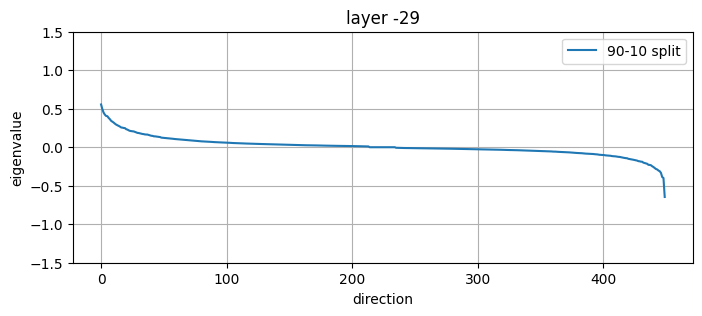

: 

In [ ]:
# for layer in tqdm(lrr_models_9010):
for layer in tqdm([-29, -30,-31]):
    weight_t1, _ = get_W_b(lrr_models_9010[layer])

    va1, _ = eig(weight_t1)

    va1_real = sorted([i.real for i in va1], reverse=True)

    plt.figure(figsize=(8, 3))

    plt.plot(va1_real[:225] + va1_real[-225:], label="90-10 split")

    plt.ylim(-1.5, 1.5)
    plt.legend(loc="upper right")
    plt.title(f"layer {layer}")
    plt.xlabel("direction")
    plt.ylabel("eigenvalue")
    plt.grid(True)

    plt.show
    
    # plt.savefig(f"../all_gitignore/sk2_items/RR_plots/inverse/one/9010_{layer}.svg", format="svg")
    # plt.close()

    break

In [12]:
# for layer in tqdm(lrr_models_9010):
for layer in tqdm([-1,-10,-20,-31]):
    weight_t1, _ = get_W_b(lrr_models_9010[layer])
    weight_t2, _ = get_W_b(lrr_models_6040[layer])
    weight_t3, _ = get_W_b(lrr_models_3070[layer])

    va1, _ = eig(weight_t1)
    va2, _ = eig(weight_t2)
    va3, _ = eig(weight_t3)

    va1_real = sorted([i.real for i in va1], reverse=True)
    va2_real = sorted([i.real for i in va2], reverse=True)
    va3_real = sorted([i.real for i in va3], reverse=True)

    plt.figure(figsize=(8, 3))

    plt.plot(va1_real[:225] + va1_real[-225:], label="90-10 split")
    plt.plot(va2_real[:225] + va2_real[-225:], label="60-40 split")
    plt.plot(va3_real[:225] + va3_real[-225:], label="30-70 split")

    plt.ylim(-1.5, 1.5)
    plt.legend(loc="upper right")
    plt.title(f"layer {layer}")
    plt.xlabel("direction")
    plt.ylabel("eigenvalue")
    plt.grid(True)
    plt.savefig(f"../all_gitignore/sk2_items/RR_plots/inverse/three/9010_6040_3070_{layer}.svg", format="svg")

    plt.close()

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [10:02<00:00, 150.73s/it]
